<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool10_DataAnalysis/blob/main/DATA11_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 시계열 모델링 기본가정 및 개념

>## 1) 시계열 데이터 특징
>- 순서 : 시계열은 시간 순서에 따른 데이터
>- 시간의존성 : 시간에 따라 변화하는 경향
>- 계절성 : 주기적인 계절성 패턴
>- 트렌드 : 장기적인 추세 및 동향 존재

>## 2) 시계열 데이터 기본 가정
>- 정상성 가정 : 통계적 특성이 시간변화에도 일정하게 유지되는 것
>- 독립성 가정 : 시간의존성 가정하지만, 현재 시점의 데이터에 영향 주는 경우 많음
>- 잔차의 정규성 가정 : 모델의 잔차가 정규분포 따른다는 가정

>## 3) 자기상관성 및 정상성 개념

>>### (1) 자기상관성
>>- 시계열 데이터 내 관측 값들 사이의 상관관계 의미
>>- 특성시간 지연(lag)에 대한 관측 값들 간의 상관관계 측정하여 시계열 데이터의 패턴과 예측에 정보 제공
>>- 데이터가 시간에 따라 얼마나 유지되는지 파악
>>- 데이터가 어떤 주기를 가지는지 파악하는데 도움

>>### (2) 정상성
>>- 시계열 데이터의 통계적 특정이 시간에 따라 일정하게 유지됨
>>- 정상성 가정시, 데이터 평균/분산/자기상관성 유지
>>- 정상성 만족하면 예측/분석에 더욱 신뢰성 높아짐
>>- 정상성 가지지 않는 데이터는 트렌드/계절성/비정상성 요소 존재가능
>>- 정상성 제거/변환하여 정상성 가진 데이터로 변환 필요

>## 4) 자기회귀모델(AR) 및 이동평균모델(MA) 개념

>>### (1) 자기회귀모델(AR)
>>- 현재 시점의 값이 이전 p개의 시점 값의 선형 조합으로 설명
>>- AR모델의 계수(파라미터)는 최소자승법 사용해서 추정됨

>>>#### AR 모델링 실습

In [ ]:
import pandas as pd
import numpy as np

#시계열 데이터 생성
np.random.seed(0)
n=100               #데이터 포인트 수
ar_params = [0.7]   #자기회귀 계수
ma_params = []      #이동평균 계수
residuals = np.random.normal(0, 1, n) #잔차생성

#AR(1) 모델생성
data = [0]          #초기값 설정
for i in range(1, n):
  data.append(ar_params[0] * data[i-1] + residuals[i])

#데이터프레임 생성
df = pd.DataFrame({'Date':pd.date_range(start='2022-01-01', periods=n, freq='D'), 'Value':data})
df = df.set_index('Date')

#데이터확인
print(df.head())

               Value
Date                
2022-01-01  0.000000
2022-01-02  0.400157
2022-01-03  1.258848
2022-01-04  3.122087
2022-01-05  4.053019


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -139.573
Method:               Conditional MLE   S.D. of innovations              0.991
Date:                Wed, 31 May 2023   AIC                            285.147
Time:                        08:21:52   BIC                            292.932
Sample:                    01-02-2022   HQIC                           288.297
                         - 04-10-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0363      0.100      0.364      0.716      -0.159       0.232
Value.L1       0.7776      0.064     12.115      0.000       0.652       0.903
                                    Roots           

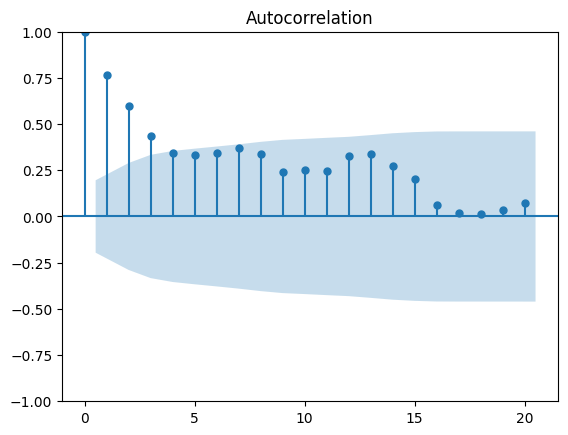

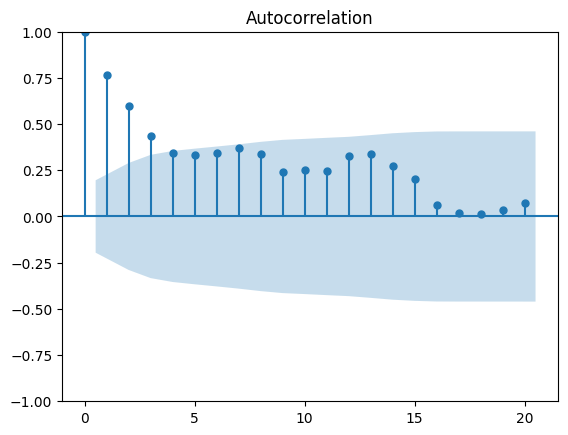

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

# AR(1) 모델 적합
model = AutoReg(df['Value'], lags=1)
results = model.fit()

# AR(1) 모델 정보 출력
print(results.summary())

# ACF 그래프 출력(ACF모델링 : 시차와 자기상관계수)
plot_acf(df['Value'], lags=20)

>>### (2) 이동평균모델(MA)
>>- Moving Average Model
>>- 시계열 데이터 예측을 위해 사용
>>- 시계열 데이터의 현재 관측치를 이전 관측치들의 오차항(잔차)의 가중 평균으로 설명
>>- 이동평균 : 이전 관측치들의 오차항 가중 평균(현재시점에서 예측값 계산에 사용)
>>- 오차항 : 예측오차를 이전 관측치들의 오차항으로 설명
>>- 이동평균차수 : 이전 관측치들의 오차항 사용해서 현재시점 예측값 계산 결정
>>- 자기상관성 : 자기상관성 없는 모델로 가정

>>#### MR 모델링 실습

       Value
0   0.000000
1   0.000000
2   0.785990
3   2.552357
4   2.568168
..       ...
95  0.653792
96  0.221856
97  1.648756
98  0.839160
99  0.095580

[100 rows x 1 columns]
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -140.502
Date:                Thu, 01 Jun 2023   AIC                            289.003
Time:                        00:24:37   BIC                            299.424
Sample:                             0   HQIC                           293.221
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0436      0.1

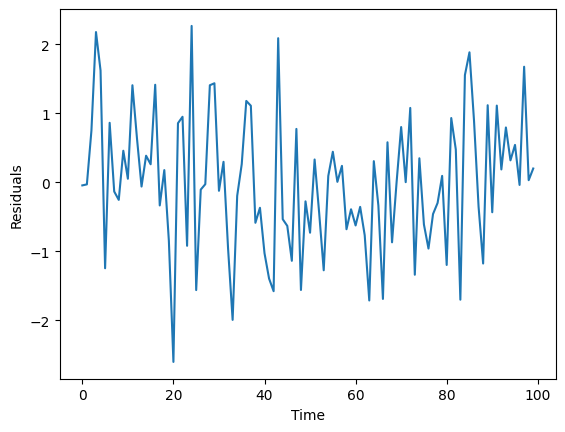

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#시계열 데이터 생성
np.random.seed(0)
n=100   #데이터 포인트 수
ma_params = [0.4, -0.2] #이동평균계수
residuals = np.random.normal(0, 1, n) #잔차생성

#MA(2) 모델 생성
data = [0, 0] #초기값 설정
for i in range(2, n):
  data.append(ma_params[0]*residuals[i-1]+ma_params[1]*residuals[i-2]+residuals[i])

#데이터프레임 생성
df = pd.DataFrame({'Value':data})
print(df)

#MA(2) 모델 적합
model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

#MA(2) 모델 정보 출력
print(results.summary())

#잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

>## 5) ARIMA (AR+MA)
>- 자기회귀모델+이동평균모델
>- 시계열 데이터의 자기상관성과 이동평균성 모두 고려함

>>### (1) ARMA : 시계열데이터 패턴 파악/예측에 유용
>>- AR : 이전 시점 값에 의존해서 현재 시점값 예측 -> 시계열 데이터 추세 설명
>>- MA : 이전 오차항에 의존해서 현재 시점값 예측 -> 시계열 데이터 찹은 설명
>>- ARIMA 자기상관성, 이동평균성 동시에 고려하여 시계열 데이터 패턴을 모델링함
>>- 백색 잡음 가정을 만족 / 정상성 가진 데이터에 적합
>>- 초기 파라미터 추정치 설정(모델의 차수 p, q

>>>#### ARMA 모델 실습

       Value
0   0.000000
1   0.000000
2   0.785990
3   3.102550
4   4.739953
..       ...
95  2.160229
96  1.734016
97  2.862567
98  2.842957
99  2.085650

[100 rows x 1 columns]
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -140.937
Date:                Thu, 01 Jun 2023   AIC                            291.874
Time:                        00:36:43   BIC                            304.900
Sample:                             0   HQIC                           297.146
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1564      0.5

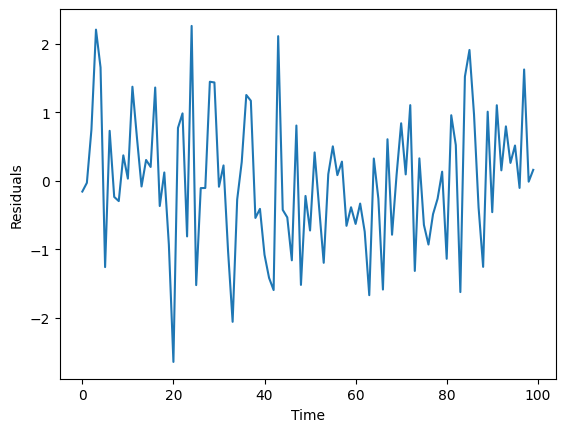

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#시계열 데이터 생성
np.random.seed(0)
n = 100   #데이터 포인트 수
ar_params = [0.7]       #자기회귀 계수
ma_params = [0.4, -0.2] #이동평균 계수
residuals = np.random.normal(0, 1, n) #잔차생성

#ARMA(1,2) 모델 생성
data = [0,0]  #초기값 설정
for i in range(2,n):
  ar_term = ar_params[0] * data[i-1]
  ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
  data.append(ar_term + ma_term + residuals[i])

#데이터프레임 생성
df = pd.DataFrame({'Value':data})
print(df)

#ARMA(1,2) 모델 적합
model = ARIMA(df['Value'], order=(1,0,2))
results = model.fit()

#ARMA(1,2) 모델정보 출력
print(results.summary())

#잔차 시계열 그래프 출력 
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

>>### (2) ARIMA
>>- AR+MA+차분
>>- 추세변동/계절성 반영 가능
>>- 차분 포함하여 데이터 비정상성 제거하고 정상성 가진 데이터로 변환
>>- 데이터에 정상성 없으면 차분 통해 정상성 확보 가능
>>- ACF / PACF 통해 최적의 차수 결정 가능
>>- 차분 적용해서 데이터 정상성 만들고, 초기 파라미터 추정치 설정
>>- 최대가능도 추정 : 초기 추정치 기반, 로그 가능도 함수 정의 후 최대화 하는 파라미터 값 찾기

>>>#### ARIMA 모델 실습

       Value
0   0.000000
1   0.000000
2   0.785990
3   3.102550
4   4.739953
..       ...
95  2.160229
96  1.734016
97  2.862567
98  2.842957
99  2.085650

[100 rows x 1 columns]
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -140.937
Date:                Thu, 01 Jun 2023   AIC                            291.874
Time:                        00:45:10   BIC                            304.900
Sample:                             0   HQIC                           297.146
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1564      0.5

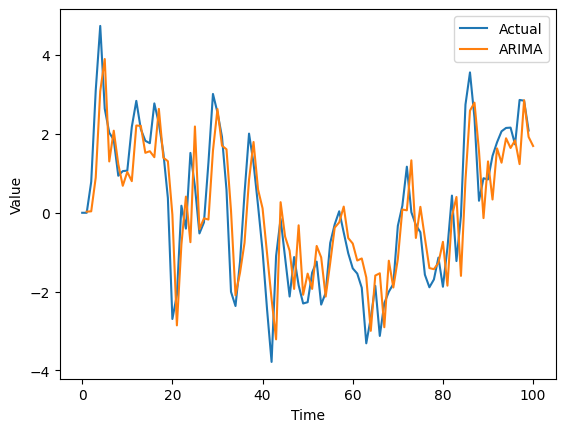

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#시계열 데이터 생성
np.random.seed(0)
n = 100                 #데이터포인트 수
ar_params = [0.7]       #자기회귀 계수 
ma_params = [0.4, -0.2] #이동평균 계수
residuals = np.random.normal(0, 1, n) #잔차생성

#ARMA(1,2) 모델 생성
data = [0, 0]   #초기값 설정
for i in range(2, n):
  ar_term = ar_params[0] * data[i-1]
  ma_term = ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2]
  data.append(ar_term + ma_term + residuals[i])

#데이터프레임 생성
df = pd.DataFrame({'Value': data})
print(df)

#ARIMA 모델 적합
model = ARIMA(df['Value'], order=(1,0, 2))
results = model.fit()

#ARIMA 모델 정보 출력
print(results.summary())

#예측 결과 그래프 출력
pred = results.predict(start=1, end=n)
plt.plot(df['Value'], label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

>## 6) 모델 선택 및 평가

>>### (1) 모델선택을 위한 정보기준
>>- AIC : 적합도와 복잡성 고려하여, 로그-우도 값 활용해서 계산
>>- BIC : 복잡성에 패널티 부여하여 과적합 방지에 초점


>>>#### ① AIC 이용한 ARIMA 모델 차수 선택 실습

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

#시계열 데이터 생성
np.random.seed(0)
n = 100   #데이터 포인트 수
data = np.random.normal(0,1,n)   #시계열데이터 생성
print(data)

#ARIMA 모델 선택을 위한 AIC 계산
best_aic = np.inf #초기변수 무한대
best_order = None #최적값 선택안함

#모델 차수 선택
for p in range(3):
  for d in range(2):
    for q in range(3):    
      order = (p, d, q)
      try:
        model = ARIMA(data, order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
          best_aic = aic
          best_order = order 
      except:
        continue

#최적 모델 출력
print("Best AIC:", best_aic)
print("Best Order:", best_order)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best AIC: 286.10561452045795
Best Order: (0, 1, 1)


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


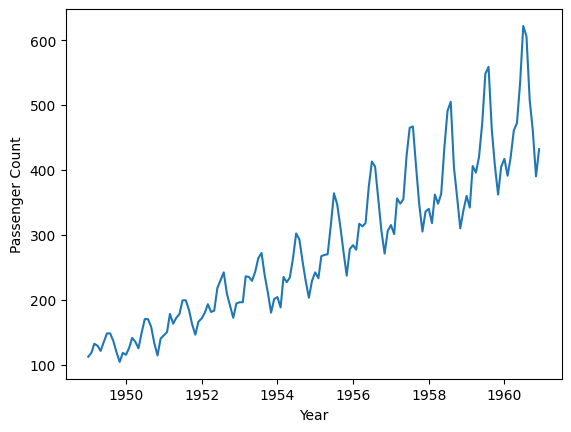

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


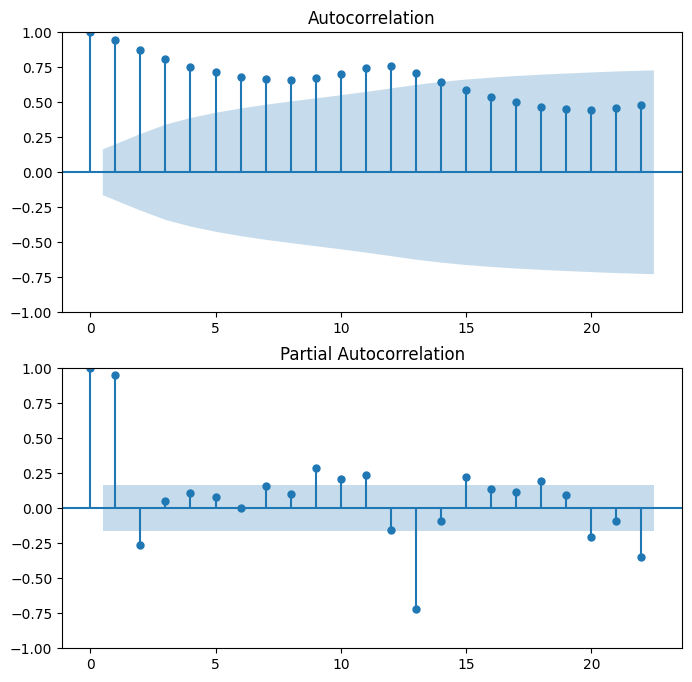

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#AirPassengers 데이터로드
data = pd.read_csv('airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print(data)

#데이터시각화
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

#자기상관함수(ACF) 및 부분자기상관함수(PACF) 그래프
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
plot_acf(data, ax=ax1)
plot_pacf(data, ax=ax2)
plt.show()

In [13]:
#ADF 검정
result = adfuller(data['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
  print(f'{key}: {value}')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Thu, 01 Jun 2023   AIC                           1353.347
Time:                        01:35:53   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

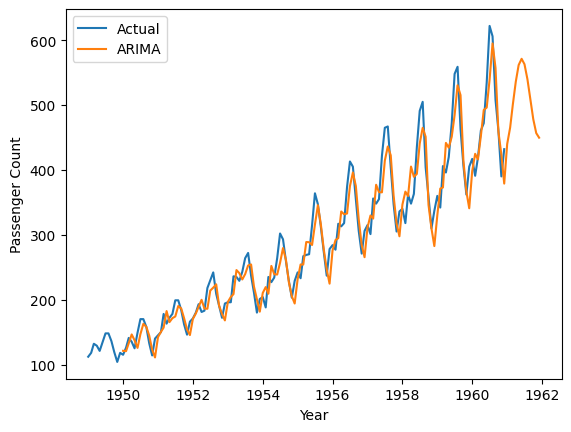

In [15]:
#ARIMA 모델 적합
model = ARIMA(data, order=(2, 1, 2))
results = model.fit()

#모델 정보 출력
print(results.summary())

#예측결과 시각화
pred = results.predict(start='1950-01-01', end='1961-12-01')
print(pred)
plt.plot(data, label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

>>### (2) 적합성 평가방법 
>>- 잔차분석 : 모델이 데이터에 적합한지, 잔차의 분포/독립성/등분산성 평가
>>- 지표이용 : 평균제곱오차, 평균절대오차, 결정계수로 평가

>## 7) Startmodels 라이브러리
>- statsmodels.api : 통계모델링 API 제공(선형회귀, 로지스틱회귀, ANOVA, ARIMA)
>- statsmodels.formula.api : R스타일의 모델 정의 
>- statsmodels.stats : 가설검정, 평균차이검정, 분산분석 등 검정 추정 함수 제공
>- statsmodels.tsa : 시계열분석모듈(ARIMA, SARIMA, VAR, GARCH)

# 2. 기타 시계열 모델 소개

>## 1) 계절성 모델(Seasonal ARIMA)
>- 계절성 패턴을 고려하는 ARIMA 확장 모델
>- 자기회귀 + 차분 + 이동평균 + 계절성

>>### 계절성 모델 실습

               Value
2022-01-31  1.764052
2022-02-28  0.400157
2022-03-31  0.978738
2022-04-30  2.240893
2022-05-31  1.867558
...              ...
2029-12-31  0.706573
2030-01-31  0.010500
2030-02-28  1.785870
2030-03-31  0.126912
2030-04-30  0.401989

[100 rows x 1 columns]


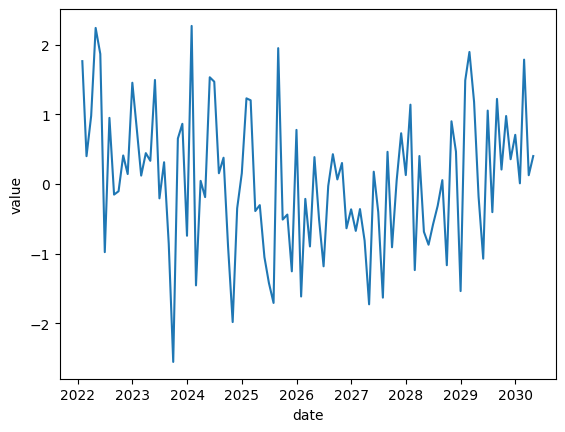

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

#시계열 데이터 생성
np.random.seed(0)
n = 100   #데이터포인트 수
data = np.random.normal(0, 1, n)  #랜덤 시계열 데이터 생성
dates = pd.date_range(start='2022-01-01', periods=n, freq='M')

#데이터프레임 생성
df = pd.DataFrame({'Value':data}, index=dates)
print(df)

#데이터시각화
plt.plot(df)
plt.xlabel('date')
plt.ylabel('value')
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -134.870
Date:                            Thu, 01 Jun 2023   AIC                            279.739
Time:                                    01:52:34   BIC                            292.069
Sample:                                01-31-2022   HQIC                           284.704
                                     - 04-30-2030                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0495      0.132     -0.376      0.707      -0.308       0.209
ma.L1         -0.8976      0.074   

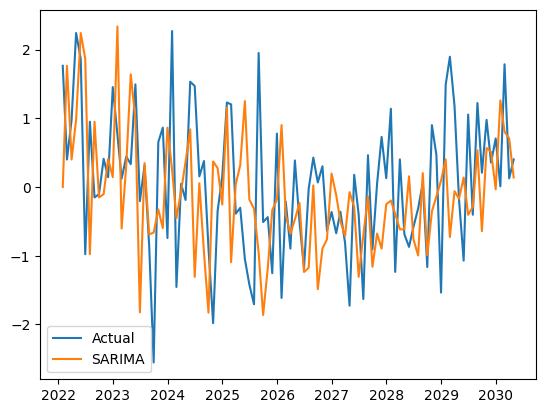

In [21]:
#Seasonal ARIMA 모델 적합 및 예측
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
print(results.summary())

#모델 예측
pred = results.predict(start='2022-01-31', end='2030-04-30')

#모델 시각화
plt.plot(df, label='Actual')
plt.plot(pred, label='SARIMA')
plt.legend()
plt.show()

>## 2) GARCH 모델 및 변동성 예측
>- 금융시계열 데이터의 변동성 모델링 위한 확률적 모델
>- 가격이나 수익률의 변동이 얼마나 크고 예측할 수 있는지 나타내는 중요한 개념
>- p개의 과거변동성, q개의 과거오차 고려하여 변동성 예측
